In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import time

In [20]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [22]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
X = df.drop(columns='Outcome').values
x

NameError: name 'x' is not defined

In [357]:
y = df['Outcome'].values
y


array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [358]:
def train_test_scratch(X,y,test_size=0.3,random_seed=42):
    
    """
    This function takes in the features and target variable and returns the train and test split
    Parameters:
    X : Features
    y : Target variable
    test_size : The size of the test set
    random_seed : Random seed for reproducibility

    Returns:
    X_train : Training features
    X_test : Testing features
    y_train : Training target variable
    y_test : Testing target variable

    """

    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_spilit = int(X.shape[0]*test_size)
    test_indices = indices[:test_spilit]
    train_indices = indices[test_spilit:]
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    return X_train,X_test,y_train,y_test

In [359]:
X_train,X_test,y_train,y_test = train_test_scratch(X,y,test_size=0.3,random_seed=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [360]:
def euclidean_distance(x1,x2):
    """
    This function takes in two vectors and returns the euclidean distance between them
    Parameters:
    x1 : First vector
    x2 : Second vector

    Returns:
    distance : Euclidean distance between the two vectors
    """

    if(len(x1) != len(x2)):
        raise ValueError('Both vectors must have same length')
    return np.sqrt(np.sum((x1-x2)**2))

try:
    euclidean_distance(np.array([1,2,3]),np.array([1,2,3]))
    print('Test Passed')
except ValueError as e:
    print(e)

Test Passed


In [361]:
def knn_predict_single(query, X_train, y_train, k=3):
    """
    This function takes in a single query point and returns the predicted class
    Parameters:
    query : The query point
    X_train : Training features
    y_train : Training target variable
    k : Number of nearest neighbors to consider

    Returns:
    predictions : The predicted class
    """
    distances = [euclidean_distance(query,x) for x in X_train]
    k_indices = np.argsort(distances)
    nearest_indices = k_indices[:k]
    k_nearest_labesl = y_train[nearest_indices]
    counts = np.bincount(k_nearest_labesl)
    predictions = np.argmax(counts)
    return predictions

In [362]:
def knn_prediction(X_test,X_train,y_train,k=3):
    """
    This function takes in the test set and returns the predictions
    Parameters:
    X_test : Testing features
    X_train : Training features
    y_train : Training target variable
    k : Number of nearest neighbors to consider

    Returns:
    predictions : The predicted class
    """


    predictions = [knn_predict_single(x,X_train,y_train,k) for x in X_test]
    return np.array(predictions)

try:
    x_test_sample = X_test[:5]
    y_test_sample = y_test[:5]
    predictions = knn_prediction(x_test_sample,X_train,y_train)
    print("predictions:",predictions)
    print("True values:",y_test_sample)
    print('Test Passed')
except ValueError as e:
    print(e)


predictions: [0 1 0 1 1]
True values: [0 0 0 0 0]
Test Passed


In [363]:
def accuracy(y_true,y_pred):
    return (np.sum(y_true == y_pred)/len(y_true))*100

In [364]:
predictions = knn_prediction(X_test_scaled,X_train_scaled,y_train)
acc = accuracy(y_test,predictions)
print('Accuracy:',acc)

Accuracy: 70.86956521739131


In [365]:
predictions = knn_prediction(X_test,X_train,y_train)
acc = accuracy(y_test,predictions)
print('Accuracy:',acc)

Accuracy: 67.3913043478261


In [366]:
def knn_experiment(X_train,y_train,X_test,y_test,k_values):
    """
    This function takes in the training and testing set and returns the accuracy for different values of k
    Parameters:
    X_train : Training features
    y_train : Training target variable
    X_test : Testing features
    y_test : Testing target variable
    k_values : List of k values

    Returns:
    accuracies : List of accuracies for different k values
    """

    accuracies = []
    individual_time = []
    for k in k_values:
        print('K:',k,)
        start_time = time.time()

        predictions = knn_prediction(X_test,X_train,y_train,k)
        print(predictions.shape,y_test.shape)

        acc = accuracy(y_test,predictions)
        end_time = time.time()

        print('Accuracy:',acc)
        accuracies.append(acc)
        individual_time.append(end_time-start_time)
        print('Time:',end_time-start_time)
    return accuracies

K: 1
(230,) (230,)
Accuracy: 63.47826086956522
K: 2
(230,) (230,)
Accuracy: 66.08695652173913
K: 3
(230,) (230,)
Accuracy: 70.86956521739131
K: 4
(230,) (230,)
Accuracy: 68.69565217391305
K: 5
(230,) (230,)
Accuracy: 70.0
K: 6
(230,) (230,)
Accuracy: 69.1304347826087
K: 7
(230,) (230,)
Accuracy: 69.56521739130434
K: 8
(230,) (230,)
Accuracy: 68.69565217391305
K: 9
(230,) (230,)
Accuracy: 69.56521739130434
K: 10
(230,) (230,)
Accuracy: 69.56521739130434
K: 11
(230,) (230,)
Accuracy: 70.86956521739131
K: 12
(230,) (230,)
Accuracy: 72.17391304347827
K: 13
(230,) (230,)
Accuracy: 71.30434782608695
K: 14
(230,) (230,)
Accuracy: 71.30434782608695
K: 15
(230,) (230,)
Accuracy: 73.91304347826086


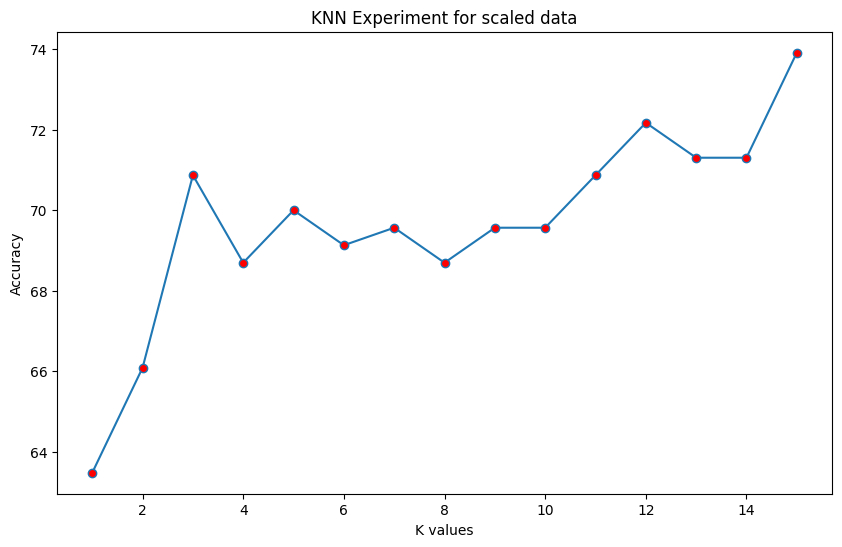

In [367]:
plt.figure(figsize=(10,6))
k_values = np.arange(1,16)
accuracies = knn_experiment(X_train_scaled,y_train,X_test_scaled,y_test,k_values)
plt.plot(k_values,accuracies,marker='o',markerfacecolor='red')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.title('KNN Experiment for scaled data')
plt.show()

K: 1
(230,) (230,)
Accuracy: 68.69565217391305
K: 2
(230,) (230,)
Accuracy: 72.60869565217392
K: 3
(230,) (230,)
Accuracy: 67.3913043478261
K: 4
(230,) (230,)
Accuracy: 72.17391304347827
K: 5
(230,) (230,)
Accuracy: 68.69565217391305
K: 6
(230,) (230,)
Accuracy: 70.0
K: 7
(230,) (230,)
Accuracy: 69.1304347826087
K: 8
(230,) (230,)
Accuracy: 71.30434782608695
K: 9
(230,) (230,)
Accuracy: 70.0
K: 10
(230,) (230,)
Accuracy: 71.73913043478261
K: 11
(230,) (230,)
Accuracy: 73.04347826086956
K: 12
(230,) (230,)
Accuracy: 73.91304347826086
K: 13
(230,) (230,)
Accuracy: 74.34782608695653
K: 14
(230,) (230,)
Accuracy: 72.60869565217392
K: 15
(230,) (230,)
Accuracy: 73.91304347826086


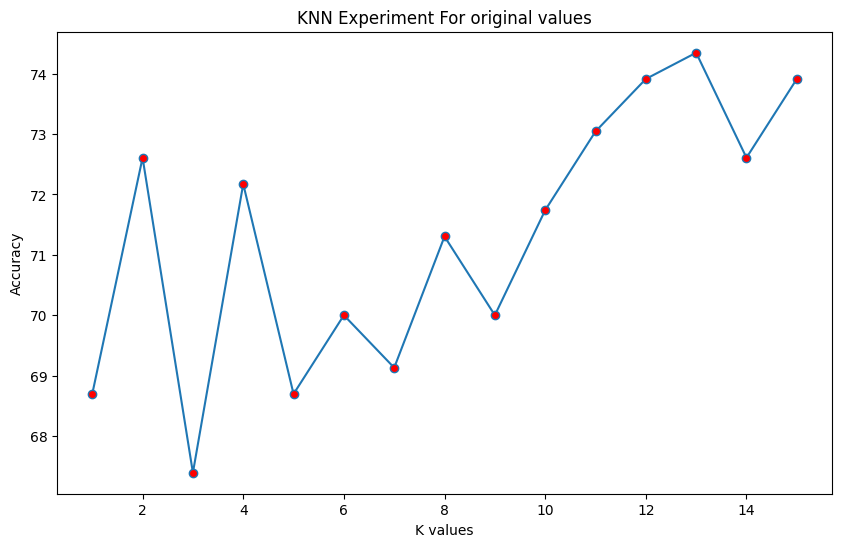

In [368]:
plt.figure(figsize=(10,6))
k_values = np.arange(1,16)
accuracies = knn_experiment(X_train,y_train,X_test,y_test,k_values)
plt.plot(k_values,accuracies,marker='o',markerfacecolor='red')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.title('KNN Experiment For original values')
plt.show()